In [1]:
import pandas as pd
import pickle
from tqdm import tqdm
from data_visualization import *

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/performance/samples_enriched_for_plotting.csv')

In [3]:
dd

,l_id,r_id,overlap_pred,overlap_true,AE,perc_num,perc_text,perc_nans,areas_ratio,area_to_tokens_ratio,...,is_num,has_nan,tot_area,area_l,area_r,area_min,overlap_area_true,overlap_area_pred,overlap_area_AE,overlap_area_error
0,100.90674,599.39969,0.250864,0.416667,0.165802,0.808824,0.191176,0.0,0.545455,0.772727,...,False,False,68,24,44,24,10.0,6.020747,3.979253,-3.979253
1,101.98420,349.84227,0.844124,0.690476,0.153648,0.118841,0.881159,0.0,0.437500,0.360313,...,False,False,690,480,210,210,145.0,177.266107,32.266107,32.266107
2,103.11614,442.62098,0.922987,0.944444,0.021457,0.315315,0.684685,0.0,0.947368,0.462500,...,False,False,111,57,54,54,51.0,49.841304,1.158696,-1.158696
3,103.33148,175.53169,0.565044,0.333333,0.231710,0.066667,0.933333,0.0,1.000000,0.833333,...,False,False,60,30,30,30,10.0,16.951305,6.951305,6.951305
4,103.33148,295.94386,0.511493,0.333333,0.178159,0.066667,0.933333,0.0,1.000000,0.833333,...,False,False,60,30,30,30,10.0,15.344784,5.344784,5.344784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52345,654.24832,73.32223,0.480696,0.142857,0.337839,0.586379,0.413621,0.0,0.720000,0.957075,...,False,False,602,252,350,252,36.0,121.135510,85.135510,85.135510
52346,654.24832,94.89675,0.000000,0.058824,0.058824,0.697674,0.302326,0.0,0.876984,0.920233,...,False,False,473,252,221,221,13.0,0.000000,13.000000,-13.000000
52347,654.24832,94.89675,0.000000,0.058824,0.058824,0.697674,0.302326,0.0,0.876984,0.920233,...,False,False,473,252,221,221,13.0,0.000000,13.000000,-13.000000
52348,654.62620,654.62660,0.743865,0.875000,0.131135,0.041667,0.958333,0.0,1.000000,0.266667,...,False,False,96,48,48,48,42.0,35.705521,6.294479,-6.294479


In [4]:
dd.columns

Index(['l_id', 'r_id', 'overlap_pred', 'overlap_true', 'AE', 'perc_num',
       'perc_text', 'perc_nans', 'areas_ratio', 'area_to_tokens_ratio',
       'total_number_of_tokens', 'is_text', 'is_num', 'has_nan', 'tot_area',
       'area_l', 'area_r', 'area_min', 'overlap_area_true',
       'overlap_area_pred', 'overlap_area_AE', 'overlap_area_error'],
      dtype='object')

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/t_exec/end_2_end_overlap_comparison/t_execs_compared_seconds_full_100tokens_with_test_repeated_for_cossim.csv')

In [3]:
dd.columns

Index(['id', 'r_id', 's_id', 'a%', 'total_time', 'graphs_generation',
       'embeddings_generation', 'overlap_computation', 'total',
       'predicted_overlap', 'r_rows', 'r_cols', 'r_area', 's_rows', 's_cols',
       's_area', 'tot_rows', 'tot_cols', 'tot_area',
       'overlap_computations_repeated', 'overlap_computations_no_read'],
      dtype='object')

In [5]:
dd[['total_time', 'total', 'overlap_computation', 'overlap_computations_repeated', 'overlap_computations_no_read']].describe()

,total_time,total,overlap_computation,overlap_computations_repeated,overlap_computations_no_read
count,199389.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.135047,0.225472,0.000493,0.000225,0.000124
std,4.776387,0.371984,0.000734,0.000005,0.000003
min,0.000073,0.002961,0.000141,0.000218,0.000119
25%,0.000434,0.043648,0.000180,0.000223,0.000123
50%,0.001404,0.058642,0.000184,0.000224,0.000124
75%,0.030425,0.309944,0.000191,0.000225,0.000124
max,63.329866,27.098526,0.002675,0.001108,0.000728


In [7]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/full_table_dict_with_id.pkl','rb') as f:
    td = pickle.load(f)

In [ ]:
len(td)

514121

In [2]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/table_dict_full.pkl','rb') as f:
    td = pickle.load(f)

In [ ]:
for k in tqdm(td.keys()):
    td[str(k)].to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/csv_tables/'+str(k)+'.csv', index=False)

100%|██████████| 418253/418253 [02:03<00:00, 3375.05it/s]


In [3]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/train.csv')
test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/test.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/1M_wikitables_disjointed/train_test_val_datasets/valid.csv')

In [4]:
train.shape

(455252, 3)

In [6]:
def get_table_set(df):
    out = []
    for r in tqdm(range(df.shape[0])):
        out.append(df.iloc[r]['r_id'])
        out.append(df.iloc[r]['s_id'])
    return set(out)

In [7]:
train_set_tables = get_table_set(train)

100%|██████████| 455252/455252 [00:16<00:00, 26890.23it/s]


In [8]:
test_set_tables = get_table_set(test)

100%|██████████| 52350/52350 [00:01<00:00, 26974.75it/s]


In [9]:
valid_set_tables = get_table_set(valid)

100%|██████████| 52530/52530 [00:01<00:00, 26902.95it/s]


In [10]:
len(train_set_tables)

177367

In [12]:
len(test_set_tables)

28621

In [13]:
len(valid_set_tables)

28664

In [14]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/performance/1_x_bins_y_MAE/wikitables/455252_52350_52530_labelled.csv').shape

(52350, 5)

In [2]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_candidates.csv')
test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_candidates.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_candidates.csv')

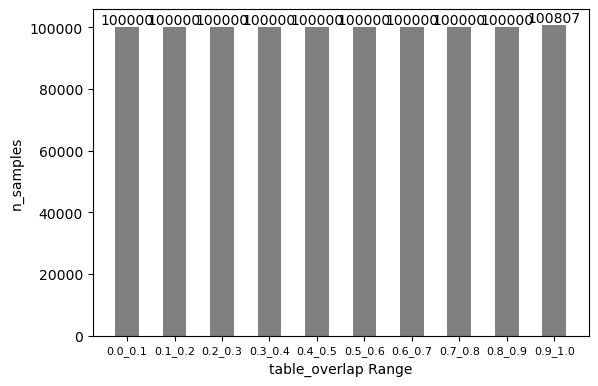

In [3]:
plot_data_distribution(train, label='table_overlap')

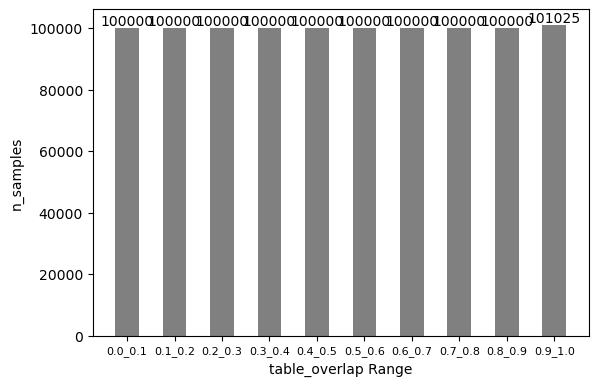

In [4]:
plot_data_distribution(test, label='table_overlap')

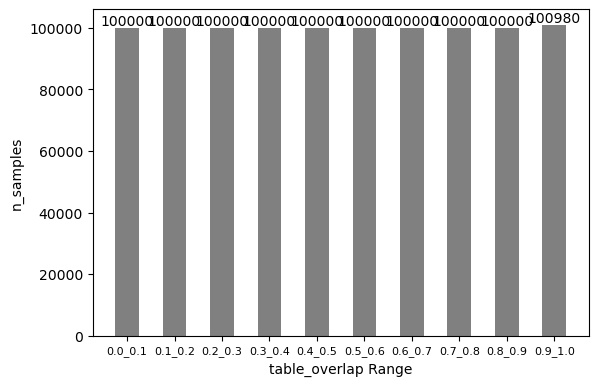

In [5]:
plot_data_distribution(valid, label='table_overlap')

In [2]:
tt = 'Giangrafo Luca'
hash(tt)

-3943134526088901419

In [6]:
hash(str(31))

2294565171690168381

In [8]:
import numpy as np
np.int64(hash(str(31)))

2294565171690168381

In [1]:
from graph import *

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mm = {
    'a':[1,2,3,4,5,6,7,8],
    'b':[9,8,7,6,5,4,3,2],
    'c':[9,8,7,6,5,4,3,2]
}

dd = pd.DataFrame(mm)

In [3]:
dd

,a,b,c
0,1,9,9
1,2,8,8
2,3,7,7
3,4,6,6
4,5,5,5
5,6,4,4
6,7,3,3
7,8,2,2


In [8]:
gg = Graph_Hashed_Node_Embs(dd, 'ff')

NameError: name 'Graph_Hashed_Node_Embs' is not defined

In [9]:
import pandas as pd

In [10]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/raw_files_csv/whole_csv_licensed.zip_P08-1028_swastika_67.csv')

In [11]:
dd

,Citance Number,Reference Article,Citing Article,Citation Marker Offset,Citation Marker,Citation Offset,Citation Text,Citation Text Clean,Reference Offset,Reference Text,Discourse Facet
0,1,P08-1028,D08-1094,0,2008.0,0,Mitchell and Lapata (2008) propose a framework...,Mitchell and Lapata (2008) propose a framework...,21.0,"<S sid=""21"" ssid=""17"">Central in these models ...",Method_Citation
1,2,P08-1028,D08-1094,0,2008.0,0,"In both experiments, we compare the SVS model ...","In both experiments, we compare the SVS model ...",27.0,"<S sid=""27"" ssid=""23"">Our results show that th...",Result_Citation
2,4,P08-1028,P14-1060,0,2008.0,0,While works such asthe SDSM model suffer from ...,While works such as the SDSM model suffer from...,189.0,"<S sid=""189"" ssid=""1"">In this paper we present...",Aim_Citation
3,6,P08-1028,P10-1097,0,2008.0,0,"Mitchell and Lapata (2008), henceforth M& amp;...","Mitchell and Lapata (2008), henceforth M& amp;...",53.0,"<S sid=""53"" ssid=""1"">We formulate semantic com...",Method_Citation
4,7,P08-1028,P10-1097,0,NaN,0,"Interestingly, Mitchell and Lapata (2008) came...","Interestingly, Mitchell and Lapata (2008) came...",NaN,NaN,NaN
5,8,P08-1028,D11-1094,0,2008.0,0,And Mitchell and Lapata (2008) propose a model...,And Mitchell and Lapata (2008) propose a model...,76.0,"<S sid=""76"" ssid=""24"">The models considered so...",Method_Citation
6,9,P08-1028,W11-0131,0,2008.0,0,Mitchell and Lapata (2008) provide a general f...,Mitchell and Lapata (2008) provide a general f...,57.0,"<S sid=""57"" ssid=""5"">Let p denote the composit...",Method_Citation
7,10,P08-1028,W11-0131,0,NaN,0,"As Mitchell and Lapata (2008) did, let us temp...","As Mitchell and Lapata (2008) did, let us temp...",NaN,NaN,NaN
8,11,P08-1028,P13-2083,0,2008.0,0,Mitchell and Lapata (2008) propose a framework...,Mitchell and Lapata (2008) propose a framework...,57.0,"<S sid=""57"" ssid=""5"">Let p denote the composit...",Method_Citation
9,12,P08-1028,P13-2083,0,2008.0,0,"As our final set of baselines, we extend two s...","As our final set of baselines, we extend two s...",190.0,"<S sid=""190"" ssid=""2"">We formulated compositio...",Result_Citation


In [1]:
import pandas as pd

In [2]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/test_data/performance/1_x_bins_y_MAE/wikitables/455252_52350_52530_labelled.csv')

In [3]:
dd.shape

(52350, 5)

In [4]:
dd

,l_id,r_id,overlap_pred,overlap_true,AE
0,100.90674,599.39969,0.250864,0.416667,0.165802
1,101.98420,349.84227,0.844124,0.690476,0.153648
2,103.11614,442.62098,0.922987,0.944444,0.021457
3,103.33148,175.53169,0.565044,0.333333,0.231710
4,103.33148,295.94386,0.511493,0.333333,0.178159
...,...,...,...,...,...
52345,654.24832,73.32223,0.480696,0.142857,0.337839
52346,654.24832,94.89675,0.000000,0.058824,0.058824
52347,654.24832,94.89675,0.000000,0.058824,0.058824
52348,654.62620,654.62660,0.743865,0.875000,0.131135
